Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset 001333, which contains electrophysiological signals from both healthy and parkinsonian subjects. The dataset includes Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) signals from the Subthalamic Nucleus (STN).

Neurosift link: https://neurosift.app/dandiset/001333

## What this notebook will cover

This notebook will demonstrate how to:

*   Load the Dandiset using the DANDI API
*   Load and visualize LFP data from an NWB file

## Required Packages

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 52 assets in the dataset
\nFirst 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


## Loading an NWB file and displaying metadata

We will load the NWB file `sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1044_ecephys.nwb` and display some of its metadata.

The URL for the asset is: https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(nwb.session_description)
print(nwb.identifier)
print(nwb.session_start_time)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
84828db4-a3a3-4b2e-abff-6db2b404dd68
2025-04-03 12:30:26.094607-04:00


## Loading and visualizing LFP data

Now we will load and visualize some LFP data from the NWB file.

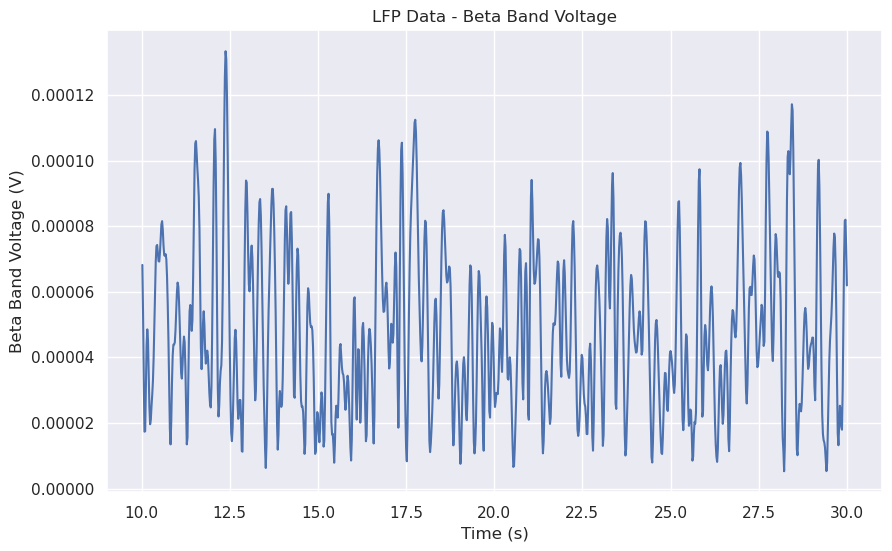

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Access the LFP data
lfp_data = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].data
lfp_timestamps = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].timestamps

# Select a subset of the data for plotting
num_samples = 1000
start_index = 0
end_index = start_index + num_samples
lfp_data_subset = lfp_data[start_index:end_index]
lfp_timestamps_subset = lfp_timestamps[start_index:end_index]

# Create a time series plot of the LFP data
plt.figure(figsize=(10, 6))
plt.plot(lfp_timestamps_subset, lfp_data_subset)
plt.xlabel("Time (s)")
plt.ylabel("Beta Band Voltage (V)")
plt.title("LFP Data - Beta Band Voltage")
plt.grid(True)
plt.show()

## Summary of Findings

This notebook demonstrated how to load and visualize LFP data from a Dandiset containing electrophysiological signals from healthy and parkinsonian subjects. The LFP data showed oscillatory behavior, which is characteristic of the beta band voltage.

## Possible Future Directions

*   Explore other NWB files in the Dandiset
*   Analyze LFP data from parkinsonian subjects and compare it to the healthy subjects
*   Investigate the relationship between Beta ARV signals and LFP signals